In [1]:
import pandas as pd
import re
from pathlib import Path
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
directory="/home/adriana/Projects/CNV/Validation/sex_distribution"

In [3]:
all_samples=pd.DataFrame(columns=["run","Sample_ID","Sample_Name","Sample_Plate","Sample_Well","Index_Plate_Well","index","index2"])

files = Path(directory).glob('*csv')
for file in files:
    df = pd.read_csv(file,index_col=None)
    filename=Path(file).name
    df['run']=filename

    all_samples=pd.concat([all_samples,df],ignore_index=True)



In [4]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)



In [5]:
samples_sex=all_samples[["run","Sample_Name"]]

In [6]:
#samples_sex["run"] = samples_sex['run'].map(lambda x: x.lstrip('002_').rstrip('_CEN_SampleSheet.csv'))
samples_sex["run"] = samples_sex['run'].str.replace('002_','')
samples_sex["run"] = samples_sex['run'].str.replace('_CEN_SampleSheet.csv','')




/tmp/ipykernel_412683/1166339021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_sex["run"] = samples_sex['run'].str.replace('002_','')
/tmp/ipykernel_412683/1166339021.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  samples_sex["run"] = samples_sex['run'].str.replace('_CEN_SampleSheet.csv','')
/tmp/ipykernel_412683/1166339021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_sex["run"] = samples_sex['run'].str.replace('_CEN_SampleS

In [7]:
samples_sex["Sex"] = samples_sex.Sample_Name.apply(lambda x: re.search(r"-['MFUN0']-", x).group().strip('-'))
samples_sex["Sex"] = samples_sex['Sex'].str.replace('0','U')


/tmp/ipykernel_412683/3062512628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_sex["Sex"] = samples_sex.Sample_Name.apply(lambda x: re.search(r"-['MFUN0']-", x).group().strip('-'))
/tmp/ipykernel_412683/3062512628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_sex["run"] = samples_sex['Sex'].str.replace('0','U')


In [8]:
counts=pd.DataFrame(columns=["Run","F","M","Other"])

In [9]:
samples_sex['Sex'].value_counts()

F    316
M    208
N      2
U      1
0      1
Name: Sex, dtype: int64

In [10]:
from openpyxl import drawing, load_workbook
from openpyxl.styles import Alignment, Border, DEFAULT_FONT, Font, Side
from openpyxl.styles.fills import PatternFill
from openpyxl.utils import get_column_letter

writer = pd.ExcelWriter('/home/adriana/Projects/CNV/Validation/Patient_Sex.xlsx', engine='openpyxl')
workbook= writer.book

In [11]:
group=pd.DataFrame(samples_sex.groupby(by=['run','Sex']).count())
group.to_excel(writer,sheet_name='Sex-by-run')
workbook.save('/home/adriana/Projects/CNV/Validation/Patient_Sex.xlsx')

In [12]:

counts = pd.DataFrame(columns=["Run","F","M","Other"])

for run in set(samples_sex['run'].to_list()):
    print(samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts())

    other=0
    try:
        samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts().N
        other+=samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts().N
    except AttributeError:
        other+=0
    try:
        samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts().U
        other+=samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts().U
    except AttributeError:
        other+=0

    df=pd.DataFrame([{
                    'Run': run,
                    'F': samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts().F,
                    'M': samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts().M,
                    'Other': other
                    }])

    #df['Other'] = samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts().N + samples_sex.loc[samples_sex['run']== run]['Sex'].value_counts().U
    counts=pd.concat([counts,df],ignore_index=True)



N    2
Name: Sex, dtype: int64


AttributeError: 'Series' object has no attribute 'F'

In [ ]:
counts

,Run,F,M,Other


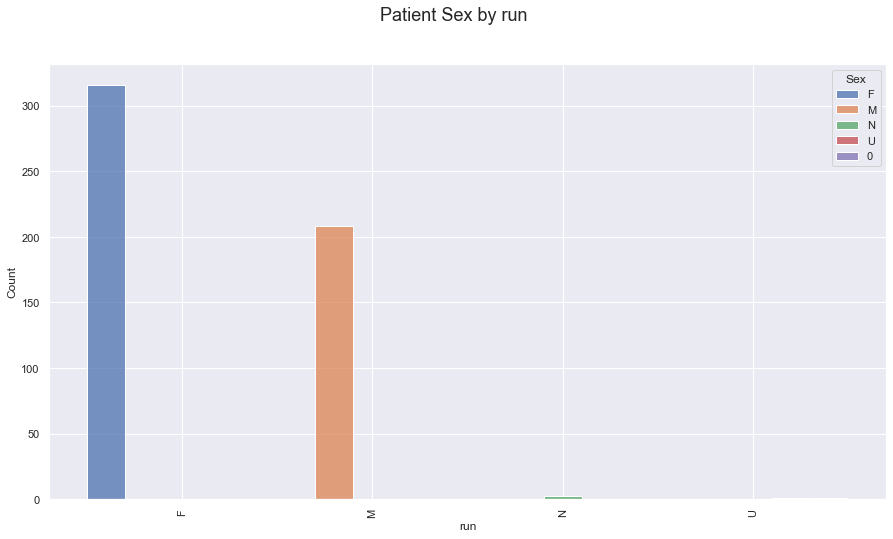

In [ ]:

#sns.set(rc = {'figure.figsize':(15,8)})
plt.figure(figsize = (15,8))
sns.histplot(samples_sex.sort_values(by=['run']),x="run",hue="Sex",multiple="dodge")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.suptitle('Patient Sex by run', fontsize = 18)
plt.savefig('cen_11runs_sex.png')